# Project: Wrangling and Analyze Data

### Imports

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import requests as r
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# Reading twitter archives with pandas read function
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Assigning image prediction to a variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [4]:
# Using request get function for save content to a variable 
response = r.get(url)
# Checking to make sure everything was successful, Resonse expected should be 200 which is "OK"
print(response)

<Response [200]>


In [5]:
# Reading content of response variable and writing it to a fike
with open('image_prediction.tsv', 'wb') as file:
    file.write(response.content)

In [6]:
# using pandas function to read saved file 
images = pd.read_csv('image_prediction.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# Creating an array to save tweet api information
tweets_list = []

# Reading json file line by line and saving it as dict to tweet_List
with open('tweet-json.txt', 'r') as file:
    for line in file.readlines():
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        tweets_list.append({'id':tweet_id,
                   'retweet_count': retweet_count,
                   'favorite_count': favorite_count})

        # Creating a dataframe from tweet_list
df_tweet = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count'])
        

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
# Saving each dataframe to a variable to reduce amount of typing since names are lenthy
df_1 = twitter_archive
df_2 = images
df_3 = df_tweet

### Visual Assessment

In [9]:
# Viewing first 5 row to visual overview of each dataframe
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df_3.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Programmatic Assessment

In [12]:
# Looking at the concise summary of each dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
# Looking at the statistical description of each dataframe
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_3.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [18]:
# Get the number of rows and columns in each dataframe
df_1.shape

(2356, 17)

In [19]:
df_2.shape

(2075, 12)

In [20]:
df_3.shape

(2354, 3)

In [21]:
# looking at a few rows of each dataframe to check out relevant issues
df_1.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1595,686358356425093120,NaN,NaN,2016-01-11 01:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Heartwarming scene here. Son reuniting w fathe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686358356...,10,10,None,None,None,None,None
558,803321560782307329,NaN,NaN,2016-11-28 19:35:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Philbert. His toilet br...,7.677549e+17,4.196984e+09,2016-08-22 16:06:54 +0000,https://twitter.com/dog_rates/status/767754930...,11,10,Philbert,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1519,690735892932222976,NaN,NaN,2016-01-23 03:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Peaches. She's a Dingleberry Zand...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690735892...,13,10,Peaches,None,None,None,None
1626,684800227459624960,NaN,NaN,2016-01-06 18:14:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Theodore. He's dapper as hell. Probably o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684800227...,11,10,Theodore,None,None,None,None


In [22]:
df_2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
740,687312378585812992,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1,seat_belt,0.703561,False,Great_Dane,0.139909,True,Weimaraner,0.021112,True
1014,709566166965075968,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,1,chow,0.999837,True,Tibetan_mastiff,0.000117,True,Australian_terrier,0.000011,True
1232,746056683365994496,https://pbs.twimg.com/media/ClqGl7fXIAA8nDe.jpg,1,Shetland_sheepdog,0.433320,True,collie,0.335997,True,borzoi,0.177179,True
67,667177989038297088,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True
1219,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,dalmatian,0.562315,True,Great_Dane,0.416478,True,German_short-haired_pointer,0.008552,True


In [23]:
df_3.sample(5)

,id,retweet_count,favorite_count
537,806620845233815552,6426,0
1012,747204161125646336,1038,3722
391,826115272272650244,3599,17299
209,852189679701164033,1741,12217
1356,703382836347330562,1285,3837


In [24]:
# Get the number of missing values in each dataframe
df_1.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [25]:
df_2.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
df_3.isna().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [27]:
# Get the number of unique values in the columns in each dataframe
df_1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [28]:
df_2.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [29]:
df_3.nunique()

id                2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [30]:
# Get the number of duplicate rows in each dataframe
df_1.duplicated().sum()

0

In [31]:
df_2.duplicated().sum()

0

In [32]:
df_3.duplicated().sum()

0

### Quality issues

#### `Twitter_archive (df_1)`  :

- Unnecessary column for our analysis(retweet_status_id, retweeted_status_user, retweeted_status_timestamp, expanded_urls )
- Missing records (in_reply_to_status, in_reply_to_user_id)
- Erroneous data type (tweet_id, timestamp)
- Name column has no missing values but have missing names recorded as none
- Some rows have atributes not relating to dogs
- Extract source of tweet is lost in html strings
- Some names have single string which are not valid names


#### `Image_predictions (df_2)` :

- Erroneous data type (tweet_id)
- Inconsistency in name format (p1, p2, p3)

#### `Tweet_json (df_3)` :

- Erroneous data type (tweet_id)

### Tidiness issues

#### `Twitter_archive (df_1)`  :

- Reduntant columns for stages of dogs (doggo, floofer, pupper, puppo) are 4 instead of a simple category column

#### `All DataFrame` (df_1, df_2, df_3) :

- Tweet_id label should be consistent across all dataset
- All dataset should be merge into one

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data

df1_clean = df_1.copy()
df2_clean = df_2.copy()
df3_clean = df_3.copy()


## Addressing Tidiness Issues

### Issue1:

#### Define
- Creating a stage variable to store all four stages, while dropping the four column

#### Code

In [34]:
# Replacing None in stage columns with empty string as follows
df1_clean.doggo.replace('None', '', inplace=True)
df1_clean.pupper.replace('None', '', inplace=True)
df1_clean.puppo.replace('None', '', inplace=True)
df1_clean.floofer.replace('None', '', inplace=True)

In [35]:
# Combine all stage into dog__stage 
df1_clean['dog_stage'] = df1_clean.doggo + df1_clean.pupper + df1_clean.puppo + df1_clean.floofer

In [36]:
# Formatting entries with multiple stages
df1_clean.loc[df1_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df1_clean.loc[df1_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df1_clean.loc[df1_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

In [37]:
# Dropping old columns
df1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [38]:
df1_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,


### Issue #2:
- Tweet_id label should be consistent across all dataset

#### Define

- Change the column from id to tweet_id in df3_clean (tweet_json)

#### Code

In [39]:
# Using rename function to change id to tweet_id
df3_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [40]:
df3_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Issue #3:
- All dataset should be merged into one

#### Define
- Tidying up my merging all 3 dataset ((df1, df2, df3)_clean) into one dataset

In [41]:
# Merging all dataset into one dataset
df_clean = pd.merge(df1_clean, df2_clean, on='tweet_id', how = 'inner').merge(df3_clean, on='tweet_id', how = 'inner')

In [42]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [43]:
df_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


### Addressing Quality issues

### Issue #1: 

#### Unnecessary columns

#### Define:
- The following columns (retweet_status_id, retweeted_status_user, retweeted_status_timestamp, expanded_urls ) will be dropped as they won't be used for any analysis and also the columns (in_reply_to_status, in_reply_to_user_id) will also be dropped due to more percentage of records in them are missing

#### Code

In [44]:
# Creating a list of columns to drop
drop_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
             'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls', 'jpg_url', 'name']

df_clean.drop(drop_list, axis=1, inplace=True)

#### Test

In [45]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'dog_stage', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

In [46]:
df_clean.isna().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
dog_stage             0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
retweet_count         0
favorite_count        0
dtype: int64

### Issue #2:
- Erroneous data type (timeStamp and Tweet_Id)

#### Define

- Convert timeStamp from int to datatime
- Convert tweet_id from from int to String

#### Code

In [47]:
# Converting columns to apporiate data type
df_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
df_clean['tweet_id'] = df1_clean['tweet_id'].astype(str)

#### Test

In [48]:
df_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
dog_stage                          object
img_num                             int64
p1                                 object
p1_conf                           float64
p1_dog                               bool
p2                                 object
p2_conf                           float64
p2_dog                               bool
p3                                 object
p3_conf                           float64
p3_dog                               bool
retweet_count                       int64
favorite_count                      int64
dtype: object

### Issue #3:
- Name column has no missing values but have missing names recorded as none

#### Define
- Change all none value to NaN

#### Code

In [49]:
# Replacing empty strings with NaN
df_clean.replace('', np.nan, inplace=True)

#### Test

In [50]:
df_clean.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
532,808001312164028416,2016-12-11 17:31:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Alfie. He's touching a ...,11,10,NaN,1,malamute,0.375098,True,jean,0.069362,False,keeshond,0.050528,True,4858,0
1623,684902183876321280,2016-01-07 00:59:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufio. He is unaware of the pink legless ...,10,10,pupper,1,Pomeranian,0.948537,True,schipperke,0.014310,True,Chihuahua,0.008120,True,103,693
1936,673956914389192708,2015-12-07 20:07:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Birmingham Quagmire named Chuk. Love...,10,10,NaN,1,basenji,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True,116,345


### Issue #4:
- Inconsistent name format for (p1,p2 and p3)


#### Define
- Change all name to either lowercase or uppercase

#### Code


In [51]:
# Change the p1, p2, and p3 values all to lower case.
df_clean['p1'] = df_clean['p1'].str.upper()
df_clean['p2'] = df_clean['p2'].str.upper()
df_clean['p3'] = df_clean['p3'].str.upper()

  ### Test

In [52]:
df_clean.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1376,701805642395348998,2016-02-22 16:27:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,10,10,NaN,1,CHIHUAHUA,0.937810,True,POMERANIAN,0.020307,True,POLECAT,0.017357,False,1320,4249
281,839290600511926273,2017-03-08 01:44:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Reggie. He hates puns. 12/10 ligh...,12,10,NaN,1,KUVASZ,0.451516,True,GOLDEN_RETRIEVER,0.317196,True,ENGLISH_SETTER,0.132759,True,1735,8735
886,759943073749200896,2016-08-01 02:45:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,13,10,doggo,1,ESKIMO_DOG,0.503372,True,SIBERIAN_HUSKY,0.390413,True,MALAMUTE,0.080901,True,52360,75163


### Issue #5:
- Source of tweet is lost in HTML strings


#### Define
- EXtract source of tweet from html tags

#### Code

In [53]:
# Using extract function to get source of tweet from html tags
df_clean['source'] = df_clean['source'].str.extract('^<a.+>(.+)</a>$')

### Test

In [54]:
df_clean['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [55]:
df_clean.sample(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
730,781661882474196992,2016-09-30 01:08:10+00:00,Twitter for iPhone,This is Lilli Bee &amp; Honey Bear. Unfortunat...,11,10,NaN,4,BARROW,0.974047,False,OLD_ENGLISH_SHEEPDOG,0.023791,True,KOMONDOR,0.001246,True,1027,3904
1397,699779630832685056,2016-02-17 02:17:19+00:00,Twitter for iPhone,I just want to be friends with this dog. Appea...,10,10,NaN,1,LAKELAND_TERRIER,0.303512,True,SOFT-COATED_WHEATEN_TERRIER,0.211424,True,GOLDEN_RETRIEVER,0.170725,True,1837,4290
133,866720684873056260,2017-05-22 18:21:28+00:00,Twitter for iPhone,RT @tallylott: h*ckin adorable promposal. 13/1...,13,10,NaN,2,ENVELOPE,0.933016,False,OSCILLOSCOPE,0.012591,False,PAPER_TOWEL,0.011178,False,882,0


In [56]:
df_clean.count()

tweet_id              2073
timestamp             2073
source                2073
text                  2073
rating_numerator      2073
rating_denominator    2073
dog_stage              320
img_num               2073
p1                    2073
p1_conf               2073
p1_dog                2073
p2                    2073
p2_conf               2073
p2_dog                2073
p3                    2073
p3_conf               2073
p3_dog                2073
retweet_count         2073
favorite_count        2073
dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
# Saving the cleaned dataset to a csv file
df_clean.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [58]:
data = pd.read_csv('twitter_archive_master.csv')
data.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,dog_stage,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,NaN,1,ORANGE,0.097049,False,BAGEL,0.085851,False,BANANA,0.07611,False,8853,39467


In [59]:
# Looking at the statistical description
data.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.073000e+03,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03,2073.000000,2073.000000
mean,7.529076e+17,12.265798,10.511819,1.203570,0.594532,1.346665e-01,6.034005e-02,2976.089243,8556.718283
std,6.698910e+16,40.699924,7.180517,0.561856,0.271234,1.006830e-01,5.092769e-02,5054.897526,12098.640994
min,6.711090e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,6.888982e+17,10.000000,10.000000,1.000000,0.364095,5.390140e-02,1.619920e-02,634.000000,1674.000000
50%,7.449710e+17,11.000000,10.000000,1.000000,0.588230,1.186220e-01,4.947150e-02,1408.000000,3864.000000
75%,8.106576e+17,12.000000,10.000000,1.000000,0.843911,1.955730e-01,9.193000e-02,3443.000000,10937.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [60]:
data.dog_stage.value_counts()

pupper           210
doggo             67
puppo             23
doggo,pupper      11
floofer            7
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64

In [61]:
# Checking correlation between retweet count and favorite count
data['retweet_count'].corr(data['favorite_count'])

0.7904760788445079

In [62]:
data.img_num.value_counts()

1    1779
2     197
3      66
4      31
Name: img_num, dtype: int64

### Insights:
1. There is strong positive linear relationship between retweet count and favorite count

2. Pupper is the popular stage for most dog by their owners

3. Image number (img_num) 1 is the most frequent

### Visualization

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

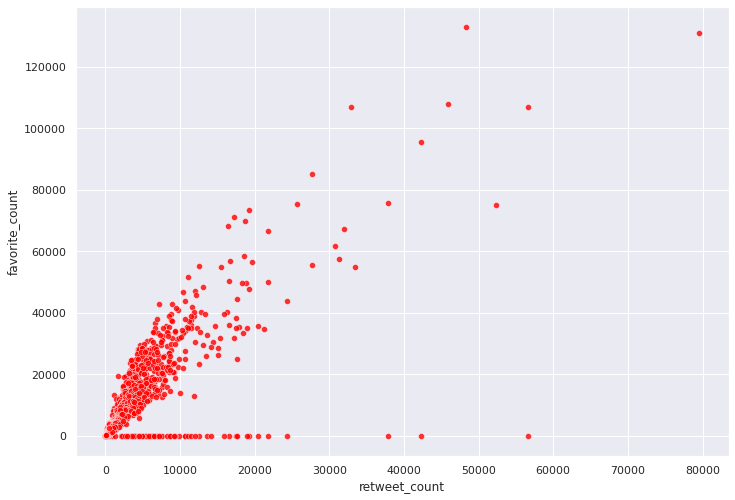

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=data, x='retweet_count', y='favorite_count', color='red', alpha=0.8)

- In the plot above we can see there is a positive linear relationship between retweet count and favorite count